In [24]:
import numpy as np
import pandas as pd
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import os 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

In [50]:
# Define the classes in our dataset
classes = ['2lanes', '3lanes', 'crossing', 'split4lanes', 'split6lanes', 'transition']

# Load the dataset
#data = np.array([[]])
data = []
labels = []

# Iterate over the folders/classes
for class_name in classes:
    folder_path = f'dataset/{class_name}'  # Replace with the path to your dataset #
    
    # Iterate over the files in each folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        data_temp = []
        for feature in range(22):
            # Load the numpy point cloud model
            array = np.load(file_path)[:,feature]
            mean_value = np.mean(array)
            data_temp.insert(-1, mean_value)
        # Append the shape to the data list
        data.append(data_temp)
            
        # Append the class label to the labels list
        index = classes.index(class_name)
        labels.append(class_name)
   

# Convert the labels to a NumPy array
X = np.array(data)
y = np.array(labels)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42) #***


In [26]:
# Let us check and confirm how many pointcloud numpy files we have

len(data)

1425

In [27]:
# Now, let us check  X and y, remember we should have 22 features so the X.shape should be (1425, 22) ,
# and y.shape is for the labels and should be (1425,)

print(X.shape)
print(y.shape)

(1425, 22)
(1425,)


In [14]:
# Let us also visualize some random samples from each class to have an understanding of the data before we proceed forward

import os
import numpy as np
import open3d as o3d

# Define the classes in your dataset
classes = ['2lanes', '3lanes', 'crossing', 'split4lanes', 'split6lanes', 'transition']

# Directory where the point cloud files are stored
DATASET_DIR = 'dataset'

# Number of samples to visualize
num_samples_to_visualize = 1

# Load and visualize the point clouds
for class_name in classes:
    folder_path = os.path.join(DATASET_DIR, class_name)
    file_names = os.listdir(folder_path)
    
    for _ in range(num_samples_to_visualize):
        file_name = np.random.choice(file_names)
        file_path = os.path.join(folder_path, file_name)
        pointcloud_data = np.load(file_path, allow_pickle=True)
        
        # Create an Open3D point cloud object
        o3d_pointcloud = o3d.geometry.PointCloud()
        o3d_pointcloud.points = o3d.utility.Vector3dVector(pointcloud_data[:, :3])
        o3d_pointcloud.colors = o3d.utility.Vector3dVector(pointcloud_data[:, 3:6] / 255.0)
        
        # Visualize the point cloud
        o3d.visualization.draw_geometries([o3d_pointcloud])


In [51]:
# Decision Tree classifier with random parameters on the training dataset

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_prediction = model.predict(X_test)
print(f"Accuracy for our Decision Tree is: {accuracy_score(y_test, y_prediction)}" )

Accuracy for our Decision Tree is: 0.7366946778711485


In [29]:
# Let us check some of the predictions obtained

predictions = model.predict(X_test)
predictions

array(['3lanes', 'transition', 'split6lanes', '3lanes', 'split6lanes',
       'crossing', 'split4lanes', 'crossing', '2lanes', '2lanes',
       'split4lanes', '2lanes', 'transition', '2lanes', 'split4lanes',
       'split4lanes', '2lanes', '2lanes', '3lanes', '2lanes', '2lanes',
       '3lanes', 'split4lanes', 'transition', '2lanes', 'split4lanes',
       '3lanes', '2lanes', 'split6lanes', '2lanes', 'transition',
       '2lanes', 'split6lanes', 'transition', 'split4lanes', '2lanes',
       '2lanes', 'crossing', 'split6lanes', 'transition', '3lanes',
       'split4lanes', 'transition', 'transition', '2lanes', 'transition',
       '2lanes', 'transition', 'split4lanes', '2lanes', '2lanes',
       '2lanes', '3lanes', 'split4lanes', '2lanes', 'transition',
       '2lanes', 'split4lanes', 'split6lanes', 'transition', '2lanes',
       'transition', '2lanes', '2lanes', 'transition', 'split4lanes',
       'split6lanes', 'split6lanes', 'split6lanes', 'transition',
       'split6lanes', 'crossing

In [30]:
# Construct a Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=['2lanes', '3lanes', 'crossing', 'split4lanes', 'split6lanes', 'transition'])

array([[106,   0,   6,   1,   0,   5],
       [  1,  34,   2,   3,   0,  11],
       [  5,   3,  13,   2,   1,  11],
       [  1,   1,   2,  33,   3,   5],
       [  1,   2,   1,   1,  45,   2],
       [  9,   5,   2,   7,   1,  32]], dtype=int64)

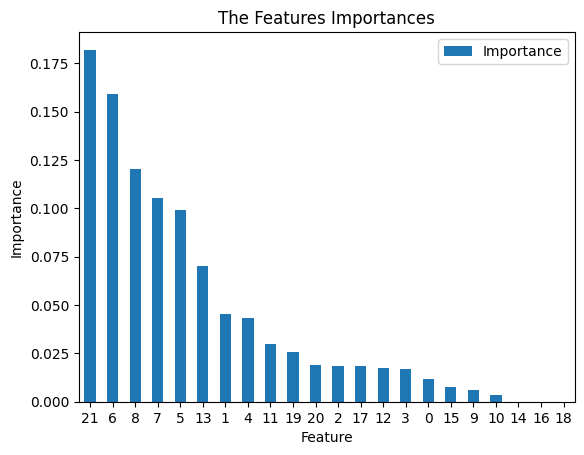

In [31]:
# Let us plot a graph showing features' importances

# Convert feature_names to a 1-dimensional array
feature_names = list(range(X_test.shape[1]))  # Create a list of feature indices

# Create the feature_importance DataFrame
feature_importance = pd.DataFrame(model.feature_importances_, index=feature_names, columns=["Importance"])

# Sort the DataFrame by importance in descending order
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot the features
The_features = feature_importance.head(22)
The_features.plot(kind="bar", rot=0)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("The Features Importances")
plt.show()

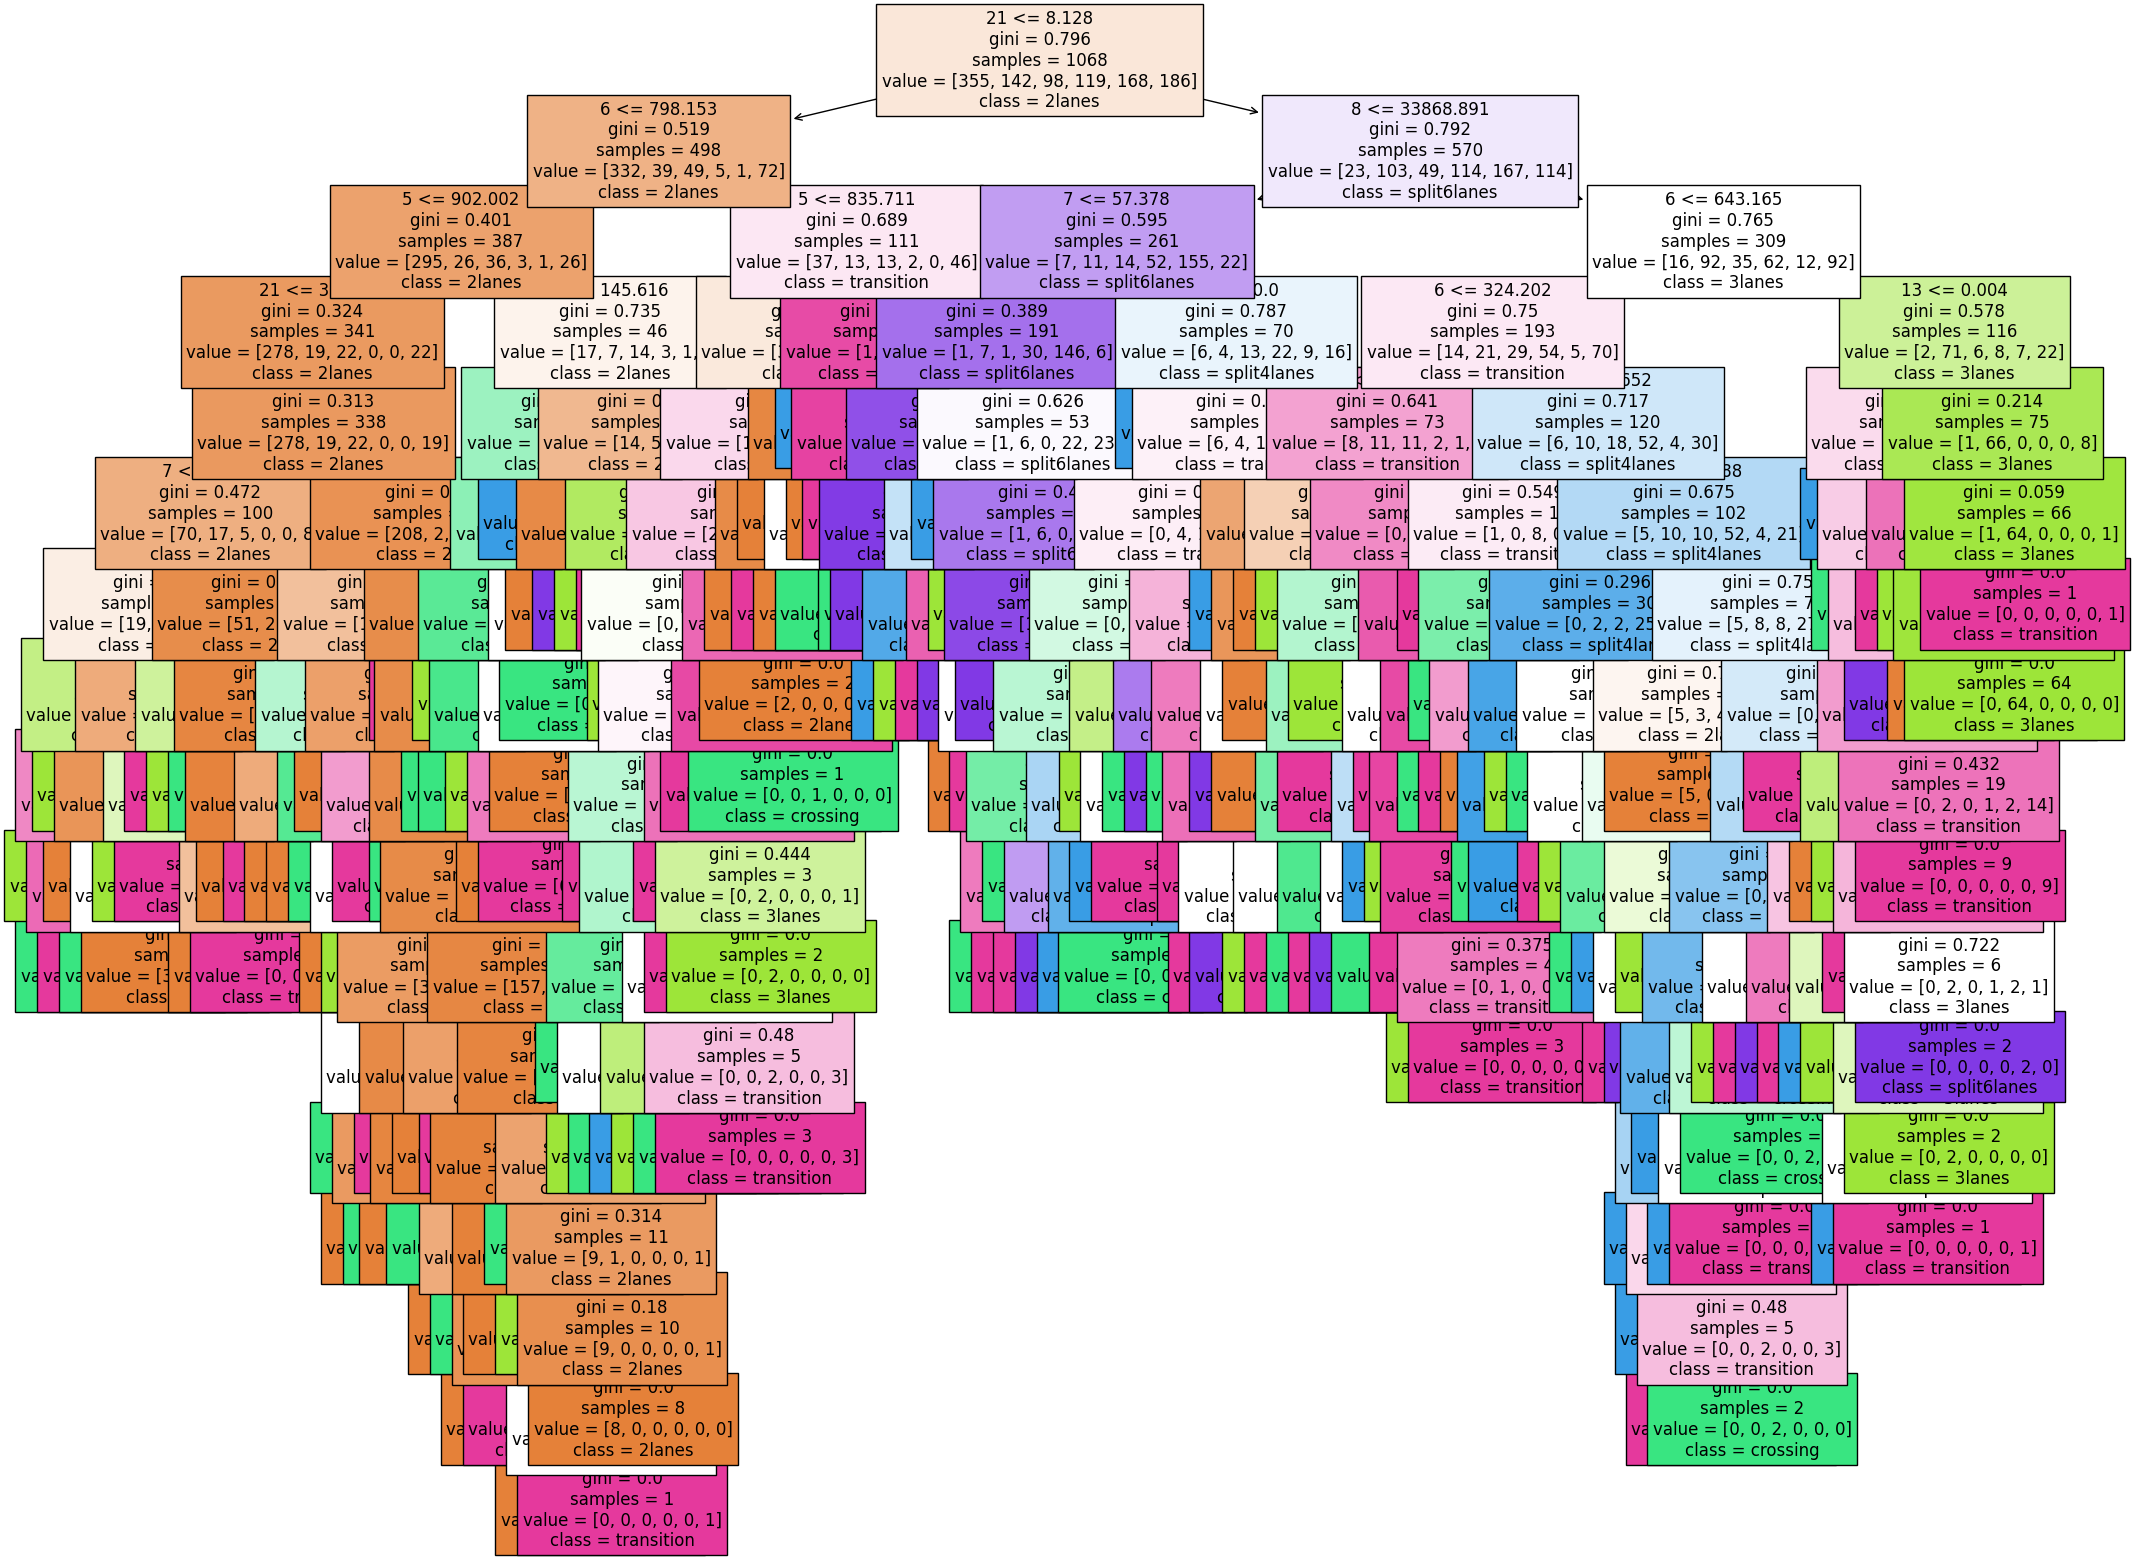

In [32]:
# visualize the trained Decision Tree classifier by creating a tree plot 

from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=feature_names,  
                   class_names=['2lanes', '3lanes', 'crossing', 'split4lanes', 'split6lanes', 'transition'],
                   filled=True,
                  fontsize=12)

In [52]:
# Adaboost Classifier

ada_model = AdaBoostClassifier(n_estimators=500, algorithm="SAMME")
# We are going to time the execution of the fitting and prediction process
start_time = time.time()

# Fit the model to the train set
ada_model.fit(X_train,y_train) # ***

# Predict the validation set 
y_prediction = ada_model.predict(X_test) #***

# Print the accuracy 
print(f"Accuracy for our Decision Tree is: {accuracy_score(y_test, y_prediction)}" ) #***

print(f"Fitting AdaBoost took: {time.time()-start_time} Seconds.")

Accuracy for our Decision Tree is: 0.5070028011204482
Fitting AdaBoost took: 3.5891387462615967 Seconds.


In [53]:
# we can perform Cross-Validation here

# create an instance of KFold, specify 3 splits, and shuffle data =True 
cv = KFold(n_splits=3, random_state=None, shuffle=True)

# Use the cross_val_score function to perform CV on the training data 
scores = cross_val_score(ada_model, X,  y, scoring='accuracy', cv=cv, n_jobs=-1)

# print out the mean accuracy and standard deviation over the 3 folds
print('Cross-Validation results: Accuracy: %.3f (%.3f)' % (np.mean(np.array(scores)), np.std(np.array(scores))))

Cross-Validation results: Accuracy: 0.506 (0.028)


In [54]:
# Using Ensemble methods like Random Forst Classifier can often lead to improved results 

#Initialize the randomforestclassifier
randomforest = RandomForestClassifier()

# Perform 3 fold cross-validation
scores = cross_val_score(randomforest, X,  y, scoring='accuracy', cv=cv, n_jobs=-1)

#print out the results
print('Random forest classifier results: Accuracy: %.3f (%.3f)' % (np.mean(np.array(scores)), np.std(np.array(scores))))

Random forest classifier results: Accuracy: 0.760 (0.038)


In [55]:
# SVM one-to-rest Approach

clf_ovr  = OneVsRestClassifier(SVC())
clf_ovr.fit(X_train,y_train)

predictions = clf_ovr.predict(X_test)

acc = accuracy_score(y_test, predictions) * 100
print(f"Test Set Accuracy : {acc} %\n\n")

# low accuracy  expected due to high no of samples

Test Set Accuracy : 42.857142857142854 %




In [56]:
# Let us perform Cross-Validation 

cv = KFold(n_splits=3, random_state=None, shuffle=True)

scores = cross_val_score(clf_ovr, X,  y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Cross-Validation results: Accuracy: %.3f (%.3f)' % (np.mean(np.array(scores)), np.std(np.array(scores))))

# Still low accuracy expected as explained earlier

Cross-Validation results: Accuracy: 0.403 (0.006)


In [61]:
#  we use the GridSearchCV technique to perform hyperparameter tuning for a RandomForestClassifier. 
#  By defining a grid of hyperparameter values to explore, 
#  the algorithm systematically searches for the combination of hyperparameters that yields the best model performance. 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import open3d as o3d
import numpy as np


# Define smaller hyperparameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'max_features': ['log2', 'sqrt'],
    'bootstrap': [True, False],
    'random_state': [42]
}

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X, y)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Display the best estimator's feature importances
print("Feature Importances:", best_estimator.feature_importances_)


Best Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
Feature Importances: [0.13433456 0.02171123 0.03843335 0.02035896 0.01632315 0.02904083
 0.05404119 0.07580771 0.06758695 0.09724222 0.02816209 0.11555985
 0.09639613 0.03192658 0.06580025 0.         0.02608846 0.
 0.02503726 0.         0.04529912 0.01085012]


In [60]:
# Classification using the XGBoost algorithm, performing RandomizedSearchCV with parallelization to find 
# the best hyperparameters, evaluating the best model's accuracy on the test set, 
# and printing the best parameters, best accuracy score, and total time taken for the search.

import numpy as np
import os
import time
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define the classes in your dataset
classes = ['2lanes', '3lanes', 'crossing', 'split4lanes', 'split6lanes', 'transition']

# Load the dataset
data = []
labels = []

# Iterate over the folders/classes
for class_name in classes:
    folder_path = f'dataset/{class_name}'
    
    # Iterate over the files in each folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        data_temp = []
        for feature in range(22):
            # Load the numpy point cloud model
            array = np.load(file_path)[:, feature]
            mean_value = np.mean(array)
            data_temp.append(mean_value)
        # Append the shape to the data list
        data.append(data_temp)
            
        # Append the class label to the labels list
        index = classes.index(class_name)
        labels.append(index)

# Convert the lists to NumPy arrays
X = np.array(data)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define the hyperparameter grid for XGBoost
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(classes))

# Perform RandomizedSearchCV with parallelization
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=20, cv=5, n_jobs=-1)
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Get the best XGBoost model and its parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_accuracy = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_accuracy)
print(f"Total time taken: {end_time - start_time:.2f} seconds")

# Evaluate the best model on the test set
y_xgb_prediction = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_xgb_prediction)
print(f"Accuracy for XGBoost Classifier on Test Set: {test_accuracy:.4f}")

Best Parameters: {'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.2, 'gamma': 0.2}
Best Accuracy Score: 0.7902242113114826
Total time taken: 56.21 seconds
Accuracy for XGBoost Classifier on Test Set: 0.7843


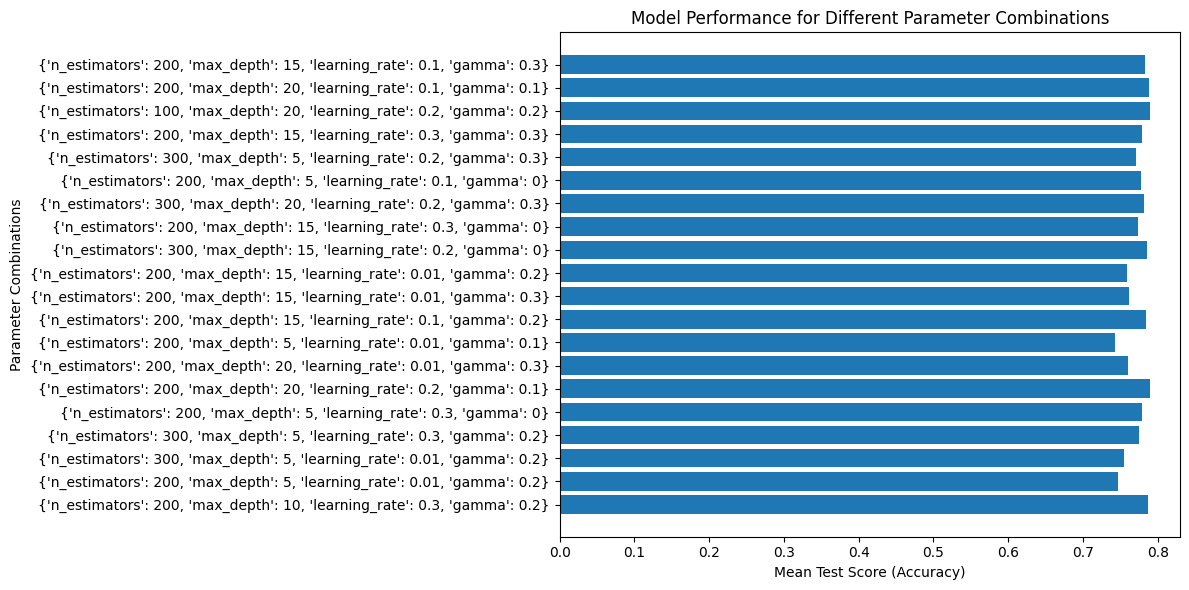

In [62]:
# Visualizing the Results: bar plot to compare the accuracy of the best model found during hyperparameter tuning 
# with different parameter combinations:


import matplotlib.pyplot as plt

# Access the cross-validation results from the RandomizedSearchCV object
cv_results = random_search.cv_results_
mean_test_scores = cv_results['mean_test_score']
param_combinations = [str(params) for params in random_search.cv_results_['params']]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(param_combinations, mean_test_scores)
plt.xlabel('Mean Test Score (Accuracy)')
plt.ylabel('Parameter Combinations')
plt.title('Model Performance for Different Parameter Combinations')
plt.tight_layout()
plt.show()


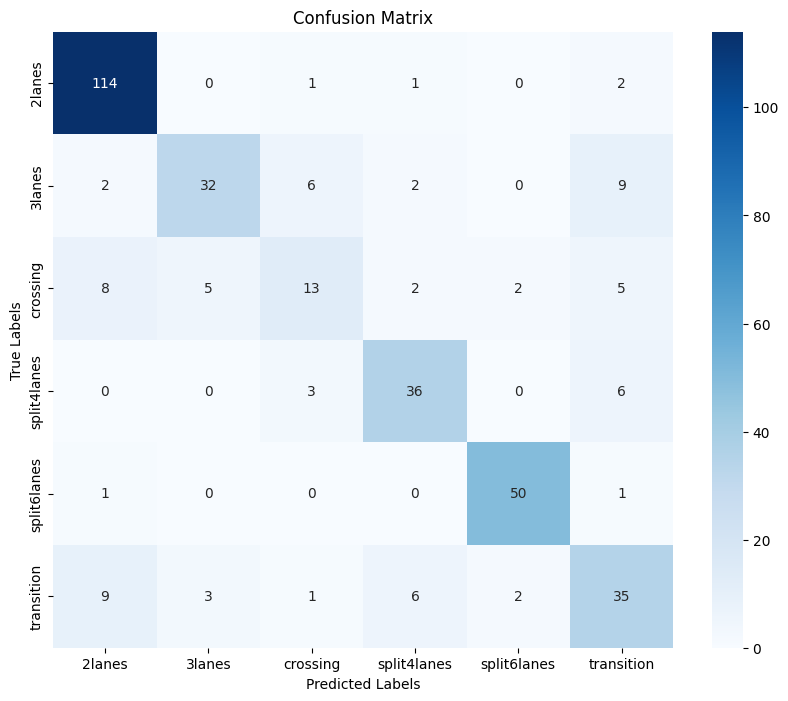

In [63]:
# Creating a Confusion Matrix:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_xgb_prediction)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


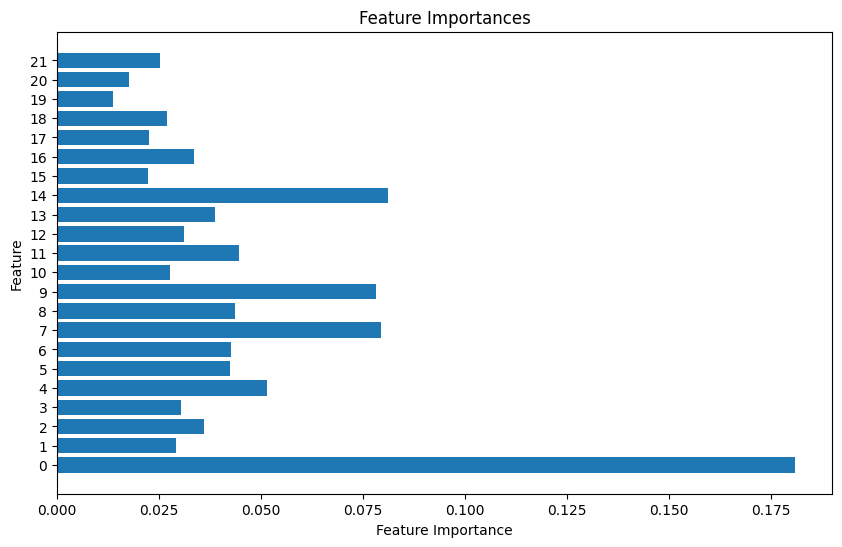

In [64]:
# Plot feature importances
feature_importances = best_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, tick_label=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [68]:
# macro-average and micro-average of precision, recall, and F1-score across all classes

from sklearn.metrics import precision_recall_fscore_support

# Compute precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_xgb_prediction, average=None)

# Compute macro-average and micro-average precision, recall, and F1-score
macro_precision, macro_recall, macro_f1_score, _ = precision_recall_fscore_support(y_test, y_xgb_prediction, average='macro')
micro_precision, micro_recall, micro_f1_score, _ = precision_recall_fscore_support(y_test, y_xgb_prediction, average='micro')

# Print the results
for i, class_name in enumerate(classes):
    print(f"Class: {class_name}")
    print(f"Precision: {precision[i]:.4f} | Recall: {recall[i]:.4f} | F1-Score: {f1_score[i]:.4f}")
    print("-" * 40)

print("Macro-Average:")
print(f"Precision: {macro_precision:.4f} | Recall: {macro_recall:.4f} | F1-Score: {macro_f1_score:.4f}")

print("Micro-Average:")
print(f"Precision: {micro_precision:.4f} | Recall: {micro_recall:.4f} | F1-Score: {micro_f1_score:.4f}")


Class: 2lanes
Precision: 0.8507 | Recall: 0.9661 | F1-Score: 0.9048
----------------------------------------
Class: 3lanes
Precision: 0.8000 | Recall: 0.6275 | F1-Score: 0.7033
----------------------------------------
Class: crossing
Precision: 0.5417 | Recall: 0.3714 | F1-Score: 0.4407
----------------------------------------
Class: split4lanes
Precision: 0.7660 | Recall: 0.8000 | F1-Score: 0.7826
----------------------------------------
Class: split6lanes
Precision: 0.9259 | Recall: 0.9615 | F1-Score: 0.9434
----------------------------------------
Class: transition
Precision: 0.6034 | Recall: 0.6250 | F1-Score: 0.6140
----------------------------------------
Macro-Average:
Precision: 0.7480 | Recall: 0.7253 | F1-Score: 0.7315
Micro-Average:
Precision: 0.7843 | Recall: 0.7843 | F1-Score: 0.7843
